In [1]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!nvdia-smi

1.11.0+cu113
11.3
/bin/bash: nvdia-smi: command not found


In [2]:
# Installing PyTorch Geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 7.9 MB 5.4 MB/s 
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 3.5 MB 5.5 MB/s 
     |████████████████████████████████| 407 kB 5.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=8b27912158f998698cba1e1cfa8b7ffa18427ac2c889a9ef1a909c6af8b42a9d
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [4]:
# Installing RDKit 
!pip install rdkit-pypi

     |████████████████████████████████| 22.7 MB 1.5 MB/s 


In [5]:
import rdkit 
from torch_geometric.datasets import MoleculeNet 

data = MoleculeNet(root='./', name="ESOL")
data

Processing...
Done!


ESOL(1128)

In [8]:
# Overview of the dataset and data points 

print(f"No. of node-level features: {data.num_features}")
print(f"No. of edge features: {data.num_edge_features}")
print(f"No. of targets to predict: {data.num_classes}")
print(f"Data sample: {data[0]}")
print(f"No. of nodes in the sample: {data[0].num_nodes}")
print(f"No. of edges in the sample: {data[0].num_edges}")


No. of node-level features: 9
No. of edge features: 3
No. of targets to predict: 734
Data sample: Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], y=[1, 1], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ')
No. of nodes in the sample: 32
No. of edges in the sample: 68


In [9]:
data[0].x   # will output a tensor of size (num_nodes, num_features)

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [10]:
# Edges in sparse COO format. Better than adj. matrix in terms of space 
# Outputs a tensor of size (2, num_edges)
# (A, B) --> Node A is connected to Node B
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [11]:
data[0].y

tensor([[-0.7700]])

In [12]:
data[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

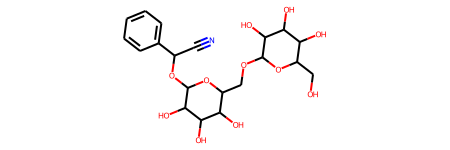

In [13]:
from rdkit import Chem 
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [23]:
config = {
    'EMBEDDING_SIZE': 64,
    'NUM_GRAPHS_PER_BATCH': 64,
    'NUM_EPOCHS': 2000,
    'LOAD_MODEL': True
}

In [22]:
from torch.nn import parameter
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch_geometric.nn as gnn


class GCN(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(42)

    self.initial_conv = gnn.GCNConv(data.num_features, config['EMBEDDING_SIZE'])
    self.conv1 = gnn.GCNConv(config['EMBEDDING_SIZE'], config['EMBEDDING_SIZE'])
    self.conv2 = gnn.GCNConv(config['EMBEDDING_SIZE'], config['EMBEDDING_SIZE'])
    self.conv3 = gnn.GCNConv(config['EMBEDDING_SIZE'], config['EMBEDDING_SIZE'])

    self.output = nn.Linear(config['EMBEDDING_SIZE']*2, 1)

  def forward(self, node_features, edge_index, batch_index):
    x = self.initial_conv(node_features, edge_index)
    x = F.tanh(x)
    x = self.conv1(x, edge_index)
    x = F.tanh(x)
    x = self.conv2(x, edge_index)
    x = F.tanh(x)
    x = self.conv3(x, edge_index)
    x = F.tanh(x)

    # Global Pooling (stacking different aggregations)
    x = torch.cat((gnn.global_max_pool(x, batch_index),
                   gnn.global_mean_pool(x, batch_index)), dim=1)
    out = self.output(x)

    return out, x

model = GCN()
print(model)
print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (output): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters: 13249


In [26]:
def save_checkpoint(state, filename="my_checkpoint.pt"):
  print("===> Saving Checkpoint")
  torch.save(state, filename)

def load_checkpoint(checkpoint): 
  print("===> Loading Checkpoint")
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [28]:
from torch_geometric.data import DataLoader   # for batching 
import warnings 
warnings.filterwarnings("ignore")

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

data_size = len(data)
train_loader = DataLoader(data[:int(data_size*0.8)], 
                          batch_size=config["NUM_GRAPHS_PER_BATCH"],
                          shuffle=True)
test_loader = DataLoader(data[int(data_size*0.8):], 
                         batch_size=config["NUM_GRAPHS_PER_BATCH"],
                         shuffle=True)

# if config["LOAD_MODEL"]: 
#   load_checkpoint(torch.load('my_checkpoint.pt'))


def train(data): 
  for batch in train_loader:
    batch.to(device)
    optimizer.zero_grad()   # Resets gradients of tensors to zero
    pred, embedding = model.forward(batch.x.float(), batch.edge_index, batch.batch)
    loss = torch.sqrt(loss_fn(pred, batch.y))  
    loss.backward()
    optimizer.step()   # Parameter update 

  return loss, embedding 


print("Starting training...")
losses = []
for epoch in range(config["NUM_EPOCHS"]):
  checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(), 
    'optimizer_state_dict': optimizer.state_dict(), 
    }
  
  if epoch % 200 == 0: 
    save_checkpoint(checkpoint)

  loss, embedding = train(data)
  losses.append(loss)
  if epoch % 100 == 0: 
    print(f"Epoch {epoch} | Train loss = {loss}")

Starting training...
===> Saving Checkpoint
Epoch 0 | Train loss = 2.9266717433929443
Epoch 100 | Train loss = 0.9369504451751709
===> Saving Checkpoint
Epoch 200 | Train loss = 0.8811594247817993
Epoch 300 | Train loss = 0.5988532900810242
===> Saving Checkpoint
Epoch 400 | Train loss = 0.28482210636138916
Epoch 500 | Train loss = 0.3368696868419647
===> Saving Checkpoint
Epoch 600 | Train loss = 0.3024764955043793
Epoch 700 | Train loss = 0.19559386372566223
===> Saving Checkpoint
Epoch 800 | Train loss = 0.20784752070903778
Epoch 900 | Train loss = 0.4331372380256653
===> Saving Checkpoint
Epoch 1000 | Train loss = 0.1777576357126236
Epoch 1100 | Train loss = 0.3251246213912964
===> Saving Checkpoint
Epoch 1200 | Train loss = 0.1254497617483139
Epoch 1300 | Train loss = 0.15926465392112732
===> Saving Checkpoint
Epoch 1400 | Train loss = 0.27474841475486755
Epoch 1500 | Train loss = 0.21748235821723938
===> Saving Checkpoint
Epoch 1600 | Train loss = 0.10190548002719879
Epoch 1700 |

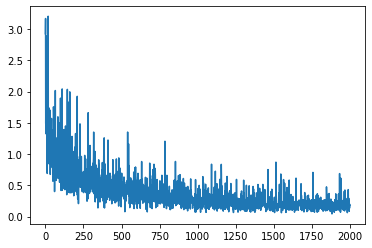

In [32]:
import seaborn as sns 
losses_f = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_idx = [i for i in range(len(losses))]
sns.lineplot(loss_idx, losses_f)